This programming exercise is from the textbook [Think Complexity, 2nd edition](https://thinkcomplex.com) by Allen Downey. This book is distributed under the [MIT License](http://opensource.org/licenses/MIT).

Some computer code from the textbook were also reused and modified for the purposes of this exercise. These reused computer code are indicated in the solution for this exercise and are still credited to the author.

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

The following is an implementation of an ER graph that relies on distributing an $m$ amount of edges between an $n$ amount of nodes. An attempt was also made to make the function robust, that is to raise an error whenever an unexpected input was made to the graph-generating function.

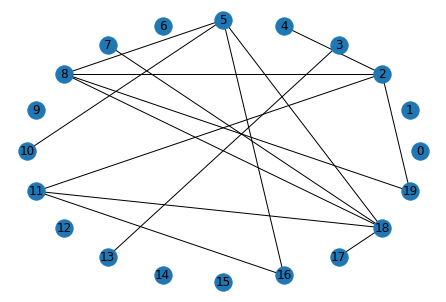

In [4]:
# Solution goes here

import networkx as nx
from random import sample

def m_pairs(nodes, m):
    edges = list()
    
    for i in range(len(nodes)):
        for k in range(len(nodes)):                    # This and the previous line creates a double sum
            if i < k:                                  # This removes double counting
                edges.append((nodes[i],nodes[k]))
                
    return sample(edges,m)                             # This returns m edges from the set of all possible edges

def make_m_graph(n,m):
    
    '''
    n: number of nodes
    m: number of edges
    '''
    
    if n < 0:
        raise ValueError('Number of nodes must be positive')
        
    if m < 0:
        raise ValueError('Number of edges must be positive')
        
    G = nx.Graph()                                     # Creates a simple graph
    nodes = range(n)
    edges = m_pairs(nodes,m)                           # Gives the m possible edges
    
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

G = make_m_graph(20,15)

nx.draw_circular(G, with_labels=True)

Note that given a simple graph with $N$ vertices, the minimum number of needed edges to make the graph fully connected is $N-1$. This may be seen simply by supposing that the graph is merely a line of $N$ nodes with $N-1$ edges connecting one node to an adjacent node such that the graph forms a chain of nodes and edges. Removing one edge (from the node at the ends, or at the middle of the chain) makes the graph disconnected. For the maximum number of edges required, this is equal to $N(N-1)/2$. For a proof of this, see https://mathworld.wolfram.com/HandshakeProblem.html.

The following code is a modified version of `prob_connected` found in the textbook. The modification here is that `prob_connected_edges` now relies on `make_m_graph` instead of `make_random graph` found in the original function `prob_connected`.

In [2]:
def prob_connected_edges(n, m, iters=200):
    count = 0
    
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        
        if is_connected(random_graph):
            count += 1
            
    return count/iters

The following functions `is_connected` and `reachable_nodes` are reused from the textbook and are used to generate the plot found at the end.

In [3]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

def reachable_nodes(G, start):
    seen = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

The following code exerpt generates the plot that shows the probability of a $20$-node graph being fully connected given an $m$ amount of edges.

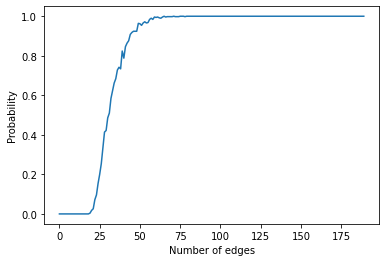

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m_values = np.arange(0,190,1, dtype=int)
data = list()

for k in m_values:
    data.append(prob_connected_edges(20,k,500))
    
plt.plot(m_values,data)
plt.xlabel('Number of edges')
plt.ylabel('Probability')
plt.show()

As explained earlier, the graph may be fully connected given $N-1$ edges hence the sharp increase in the probability right after $M = N-1$ which in this case occurs at $M = 19$. From this, the critical value is then $p^{*} = N-1$.